# Arrays of school expenditure data for Washington, DC
## For Edunomics Lab

By: Jaren Haber, PhD, MDI Postdoc  
Date: August 29, 2020

## Initialize & read data

In [218]:
# Import packages
import pandas as pd
import seaborn as sns
from nltk import word_tokenize
from matplotlib import pyplot as plt

# Set visualization options
sns.set(style="white")

In [203]:
# Define file locations
expenditures_file = "2019 DC School Report Card Per-Pupil Expenditures.xlsx"
publicdata_file = "2019 DC School Report Card Aggregate Public Data.xlsx"

# Define expenditure columns to keep
keepcols = ["School Code", 
            "Total Per-Pupil Expenditure", "School Expenditures: State/Local", "School Expenditures: Federal", 
            "Centralized Expenditures", "Centralized Expenditures: State/Local", "Centralized Expenditures: Federal", 
            "Total School Level Expenditure", "School Level: State/Local", "School Level: Federal"]

In [204]:
# Read excel files, keep only relevant sheets
exp_df1 = pd.read_excel(expenditures_file, sheet_name="Multi-Site School Finance", header=1, usecols=keepcols)#, dtype="int64")
exp_df2 = pd.read_excel(expenditures_file, sheet_name="Single-Site School Finance", header=1, usecols=keepcols)#, dtype="int64")
agg_df = pd.read_excel(publicdata_file, sheet_name="Enrollment")

In [205]:
exp_df1.head()

,School Code,Total Per-Pupil Expenditure,School Expenditures: State/Local,School Expenditures: Federal,Total School Level Expenditure,School Level: State/Local,School Level: Federal,Centralized Expenditures,Centralized Expenditures: State/Local,Centralized Expenditures: Federal
0,175,20573,18759,1814,13698,13382,316,6875,5377,1498
1,202,20775,17827,2948,13900,12450,1451,6875,5377,1498
2,203,19992,17609,2383,13117,12231,886,6875,5377,1498
3,204,20840,18501,2340,13965,13123,842,6875,5377,1498
4,205,21210,18738,2472,14335,13361,974,6875,5377,1498


In [206]:
agg_df.head()

,LEA Code,LEA Name,School Code,School Name,Entity Type,Ward,Student Group,Grade,Percent Enrolled,Enrollment Count,Total Count of Students
0,001,District of Columbia Public Schools,175,School-Within-School @ Goding,DCPS,6,All Report Card Students,1,15,49.0,320
1,001,District of Columbia Public Schools,175,School-Within-School @ Goding,DCPS,6,All Report Card Students,2,13,42.0,320
2,001,District of Columbia Public Schools,175,School-Within-School @ Goding,DCPS,6,All Report Card Students,3,14,44.0,320
3,001,District of Columbia Public Schools,175,School-Within-School @ Goding,DCPS,6,All Report Card Students,4,13,43.0,320
4,001,District of Columbia Public Schools,175,School-Within-School @ Goding,DCPS,6,All Report Card Students,5,5,16.0,320


## Prepare data

In [207]:
print("Original number of rows:", len(agg_df))

# Drop rows where School Code (used for matching) is "All", as in charter networks
agg_df.drop(agg_df.loc[agg_df["School Code"]=="All"].index, inplace=True)
print("Number rows after dropping 'All' names:", len(agg_df))

# Drop rows other than where Student Group is "At Risk"--also has total counts
agg_df.drop(agg_df.loc[agg_df["Student Group"]!="At-Risk"].index, inplace=True)
print("Number rows after dropping rows other than 'At-Risk':", len(agg_df))

Original number of rows: 4886
Number rows after dropping 'All' names: 4400
Number rows after dropping rows other than 'At-Risk': 229


In [208]:
# Check data types
print(type(agg_df["School Code"].iloc[0]))
print(type(exp_df1["School Code"].iloc[0]))
print(type(exp_df2["School Code"].iloc[0]))

<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>


In [209]:
# Coerce data type to int64
agg_df["School Code"] = agg_df["School Code"].astype("int64")
print(type(agg_df["School Code"].iloc[0]))

<class 'numpy.int64'>


In [210]:
# Merge DFs
exp_df_merged = pd.concat([exp_df1, exp_df2], join="outer") # merge school lists of spending data
df = pd.merge(agg_df, exp_df_merged, how="outer", on="School Code") # merge spending data into enrollment data
df

,LEA Code,LEA Name,School Code,School Name,Entity Type,Ward,Student Group,Grade,Percent Enrolled,Enrollment Count,Total Count of Students,Total Per-Pupil Expenditure,School Expenditures: State/Local,School Expenditures: Federal,Total School Level Expenditure,School Level: State/Local,School Level: Federal,Centralized Expenditures,Centralized Expenditures: State/Local,Centralized Expenditures: Federal
0,001,District of Columbia Public Schools,175,School-Within-School @ Goding,DCPS,6,At-Risk,All,5.0,NaN,320.0,20573,18759,1814,13698.0,13382.0,316.0,6875.0,5377.0,1498.0
1,001,District of Columbia Public Schools,202,Aiton Elementary School,DCPS,7,At-Risk,All,76.0,NaN,268.0,20775,17827,2948,13900.0,12450.0,1451.0,6875.0,5377.0,1498.0
2,001,District of Columbia Public Schools,203,Amidon-Bowen Elementary School,DCPS,6,At-Risk,All,63.0,NaN,362.0,19992,17609,2383,13117.0,12231.0,886.0,6875.0,5377.0,1498.0
3,001,District of Columbia Public Schools,204,Bancroft Elementary School,DCPS,1,At-Risk,All,25.0,NaN,591.0,20840,18501,2340,13965.0,13123.0,842.0,6875.0,5377.0,1498.0
4,001,District of Columbia Public Schools,205,Barnard Elementary School,DCPS,4,At-Risk,All,46.0,NaN,700.0,21210,18738,2472,14335.0,13361.0,974.0,6875.0,5377.0,1498.0
5,001,District of Columbia Public Schools,206,Beers Elementary School,DCPS,7,At-Risk,All,55.0,NaN,524.0,20598,17782,2816,13723.0,12404.0,1318.0,6875.0,5377.0,1498.0
6,001,District of Columbia Public Schools,212,Brent Elementary School,DCPS,6,At-Risk,All,4.0,NaN,439.0,16933,15183,1750,10058.0,9805.0,252.0,6875.0,5377.0,1498.0
7,001,District of Columbia Public Schools,213,Brightwood Education Campus,DCPS,4,At-Risk,All,36.0,NaN,835.0,20682,18419,2263,13807.0,13041.0,766.0,6875.0,5377.0,1498.0
8,001,District of Columbia Public Schools,219,Bunker Hill Elementary School,DCPS,5,At-Risk,All,45.0,NaN,259.0,21933,19037,2896,15058.0,13660.0,1398.0,6875.0,5377.0,1498.0
9,001,District of Columbia Public Schools,220,Burroughs Elementary School,DCPS,5,At-Risk,All,45.0,NaN,301.0,23352,20873,2479,16477.0,15496.0,981.0,6875.0,5377.0,1498.0


In [211]:
# Check data integrity
print("Number WITH finance data:", len(df[df["Total Per-Pupil Expenditure"].notnull()]))
print("Number missing finance data:", len(df[df["Total Per-Pupil Expenditure"].isnull()]))

Number WITH finance data: 231
Number missing finance data: 0


In [410]:
# Make new column with School Code + First two words of School Name, for clear naming of visuals - TO DO: Fix this
#df["id"] = df["School Code"].astype(str) + " " + df["School Name"].apply(
#    lambda x: word_tokenize(x)[:2] if not np.isnan(x) else x) #(len(str(x))>0)
#df["id"]

In [212]:
# Find quintiles by percent At-Risk students
q20 = df["Percent Enrolled"].quantile(q=0.2)
q40 = df["Percent Enrolled"].quantile(q=0.4)
q60 = df["Percent Enrolled"].quantile(q=0.6)
q80 = df["Percent Enrolled"].quantile(q=0.8)

print("Min/max:", str(df["Percent Enrolled"].min()) + ",", (df["Percent Enrolled"].max()))
print("Quintiles:", str(q20) + ",", str(q40) + ",", str(q60) + ",", str(q80))

Min/max: 1.0, 99.0
Quintiles: 24.6, 47.0, 59.0, 72.0


In [213]:
# Separate DF into quintiles 
df20 = df[df["Percent Enrolled"] <= q20].sort_values(by="Total Per-Pupil Expenditure", ascending=True).reset_index()
df40 = df[df["Percent Enrolled"].apply(lambda x: x > q20 and x <= q40)].sort_values(by="Total Per-Pupil Expenditure", ascending=True).reset_index()
df60 = df[df["Percent Enrolled"].apply(lambda x: x > q40 and x <= q60)].sort_values(by="Total Per-Pupil Expenditure", ascending=True).reset_index()
df80 = df[df["Percent Enrolled"].apply(lambda x: x > q60 and x <= q80)].sort_values(by="Total Per-Pupil Expenditure", ascending=True).reset_index()
df100 = df[df["Percent Enrolled"] > q80].sort_values(by="Total Per-Pupil Expenditure", ascending=True).reset_index()

In [214]:
df20

,index,LEA Code,LEA Name,School Code,School Name,Entity Type,Ward,Student Group,Grade,Percent Enrolled,...,Total Count of Students,Total Per-Pupil Expenditure,School Expenditures: State/Local,School Expenditures: Federal,Total School Level Expenditure,School Level: State/Local,School Level: Federal,Centralized Expenditures,Centralized Expenditures: State/Local,Centralized Expenditures: Federal
0,226,303,The Family Place PCS,1036,The Family Place PCS,Charter,1,At-Risk,All,16.0,...,173.0,7975,7975,0,NaN,NaN,NaN,NaN,NaN,NaN
1,205,168,Basis DC PCS,3068,BASIS DC PCS,Charter,2,At-Risk,All,8.0,...,642.0,12423,12173,250,NaN,NaN,NaN,NaN,NaN,NaN
2,200,162,Carlos Rosario International PCS,1119,Carlos Rosario International PCS,Charter,1,At-Risk,All,13.0,...,3220.0,13674,13553,122,NaN,NaN,NaN,NaN,NaN,NaN
3,216,181,District of Columbia International School,248,District of Columbia International School,Charter,4,At-Risk,All,19.0,...,1066.0,14049,13145,905,NaN,NaN,NaN,NaN,NaN,NaN
4,82,001,District of Columbia Public Schools,405,Deal Middle School,DCPS,3,At-Risk,All,7.0,...,1549.0,15797,13948,1849,8922.0,8570.0,352.0,6875.0,5377.0,1498.0
5,22,001,District of Columbia Public Schools,254,Janney Elementary School,DCPS,3,At-Risk,All,1.0,...,748.0,15805,14015,1790,8930.0,8638.0,292.0,6875.0,5377.0,1498.0
6,70,001,District of Columbia Public Schools,333,Watkins Elementary School (Capitol Hill Cluster),DCPS,6,At-Risk,All,21.0,...,460.0,15828,14055,1773,8953.0,8677.0,275.0,6875.0,5377.0,1498.0
7,136,119,Briya PCS,126,Briya PCS,Charter,5,At-Risk,All,10.0,...,975.0,16045,15674,371,NaN,NaN,NaN,NaN,NaN,NaN
8,26,001,District of Columbia Public Schools,261,Lafayette Elementary School,DCPS,4,At-Risk,All,4.0,...,904.0,16317,14073,2244,9442.0,8695.0,746.0,6875.0,5377.0,1498.0
9,184,144,Elsie Whitlow Stokes Community Freedom PCS,159,Elsie Whitlow Stokes Community Freedom PCS - B...,Charter,5,At-Risk,All,11.0,...,352.0,16482,14904,1578,14564.0,14459.0,105.0,1918.0,445.0,1474.0


## Simple visualizations of per-pupil spending

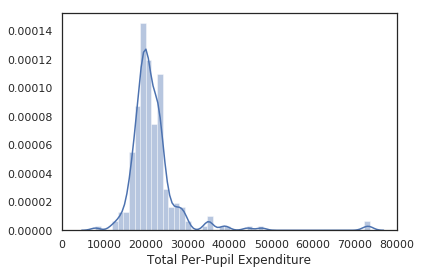

In [157]:
# Simple probability distribution of spending data
ax = sns.distplot(df["Total Per-Pupil Expenditure"])
ax.set(xlim=(0,80000))
plt.show()

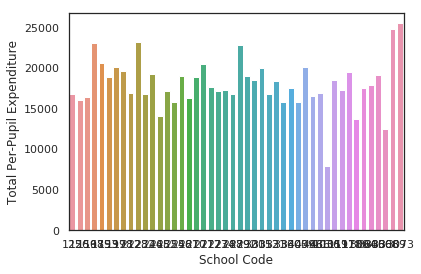

In [311]:
# Simple bar plot of spending
ax = sns.barplot(x = "School Code", y = "Total Per-Pupil Expenditure", data = df20)
plt.show()

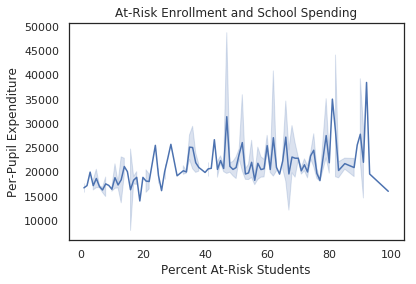

In [363]:
ax = sns.lineplot(x = "Percent Enrolled", y = "Total Per-Pupil Expenditure", data = df, color = "b")
ax.set(xlabel = "Percent At-Risk Students", ylabel = "Per-Pupil Expenditure")
ax.set_title("At-Risk Enrollment and School Spending")
plt.show()

## Visualizing with cool bar plots

In [397]:
def makegraph(merged_df, 
              idcol = "School Code", 
              spendcol = "Total Per-Pupil Expenditure", 
              enrollcol = "Percent Enrolled", 
              title = "District of Columbia Per-Pupil Expenditures FY19", 
              short_title = "DC Per-Pupil Expenditures", 
              subtitle = "", 
              size = (20, 10)):
    
    """Use DF with school spending data and economic disadvantage/at-risk to make nice bar plots."""
    

    f, ax = plt.subplots(figsize=size) # initialize
    topscore = merged_df[spendcol].max()
    bottomscore = merged_df[spendcol].min()

    #sns.set_color_codes("pastel")

    # Plot total (remaining sliver of difference from state $ will be federal $)
    sns.barplot(x = idcol, y = spendcol, data = merged_df, order = merged_df[idcol], 
                label = "Per Pupil Federal $", color="goldenrod")

    # Plot state $
    sns.barplot(x = idcol, y = "School Expenditures: State/Local", data = merged_df, order = merged_df[idcol], 
                label = "Per Pupil State & Local $", color="b")

    # Add legend and axis labels
    ax.legend(ncol=2, loc="upper left", frameon = True, fontsize=14)
    ax.set(ylabel="", xlabel=idcol, ylim=(0,1.15*topscore))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
    
    if len(subtitle) > 0:
        ax.set_title(title + ": " + subtitle, fontsize=18, pad=15)
    else:
        ax.set_title(title, fontsize=18, pad=15)

    # Annotate bar plot woth bar values
    for index, row in merged_df.iterrows():
        ax.text(row.name, row[spendcol]+(.14*topscore), ("$" + str('{:,.0f}'.format(
            round(row[spendcol],2)))), 
            color='b', ha="center", va="top", rotation=90, fontsize=14)


    # Add summary notes at top left
    props = dict(boxstyle="square", facecolor="white", edgecolor="b", alpha=0.5) # format text box

    # Define text to go in box
    textstr = (("Gap between highest and lowest per-pupil expenditures = $" + (str('{:,.0f}'.format(
        topscore - bottomscore))))  + "\n" + 
               ("Average total per-pupil expenditures = $" + str('{:,.0f}'.format(round(merged_df[spendcol].mean(),0)))) + "\n" + 
               ("Average percent At-Risk students = " + str(round(merged_df[enrollcol].mean(),1)) + "%"))

    # Use axis coordinates to place text
    ax.text(0.01, 0.92, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment="top", color="black", bbox=props)        

    plt.savefig("figures/" + short_title + " - " + subtitle + ".png")
    plt.show()

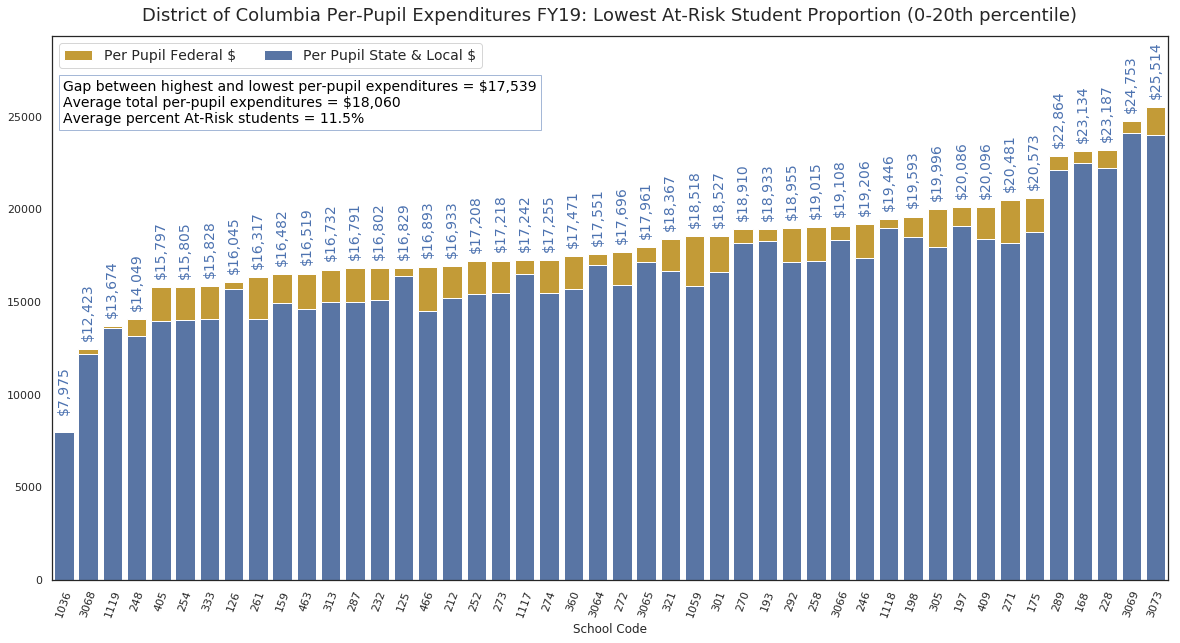

In [398]:
makegraph(df20, subtitle = "Lowest At-Risk Student Proportion (0-20th percentile)")

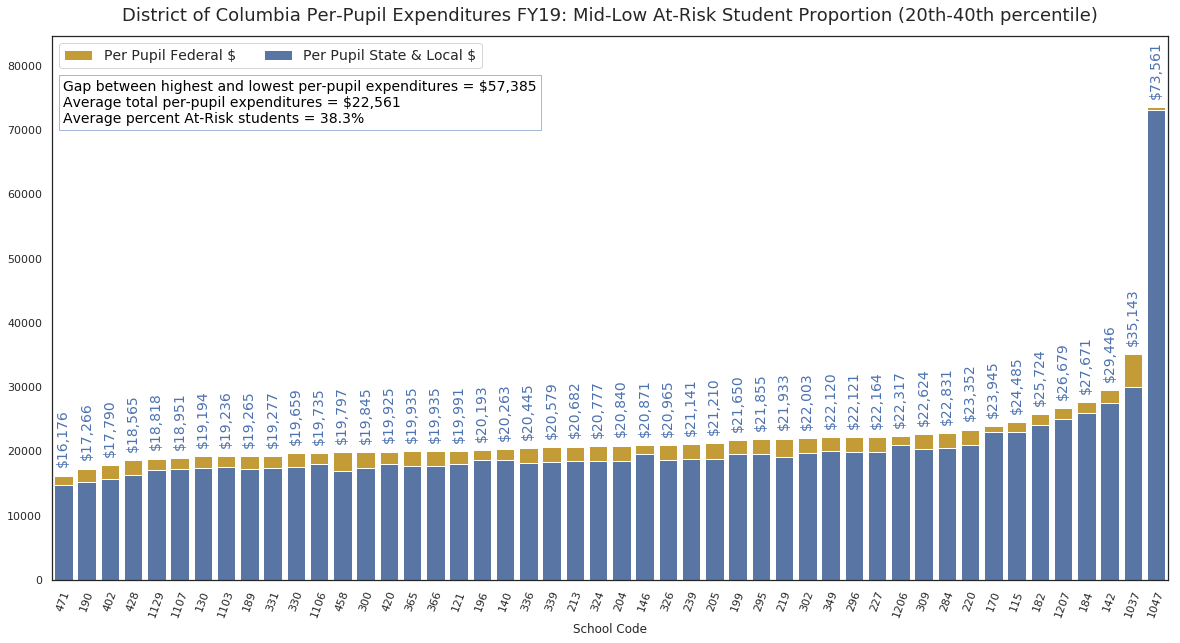

In [399]:
makegraph(df40, subtitle = "Mid-Low At-Risk Student Proportion (20th-40th percentile)")

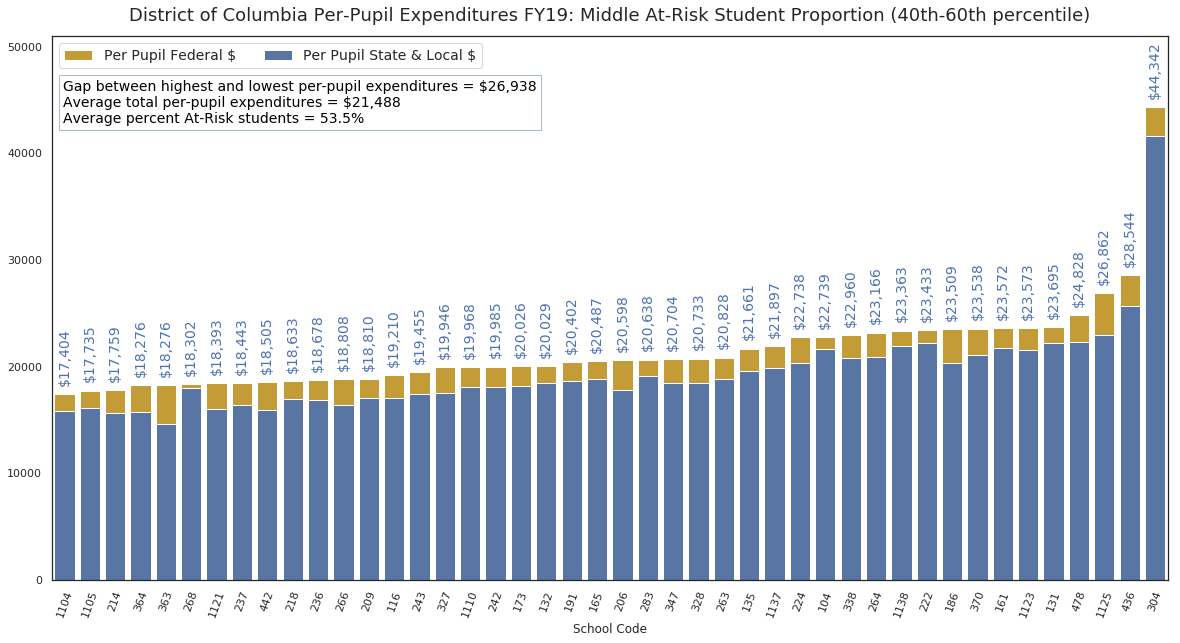

In [400]:
makegraph(df60, subtitle = "Middle At-Risk Student Proportion (40th-60th percentile)")

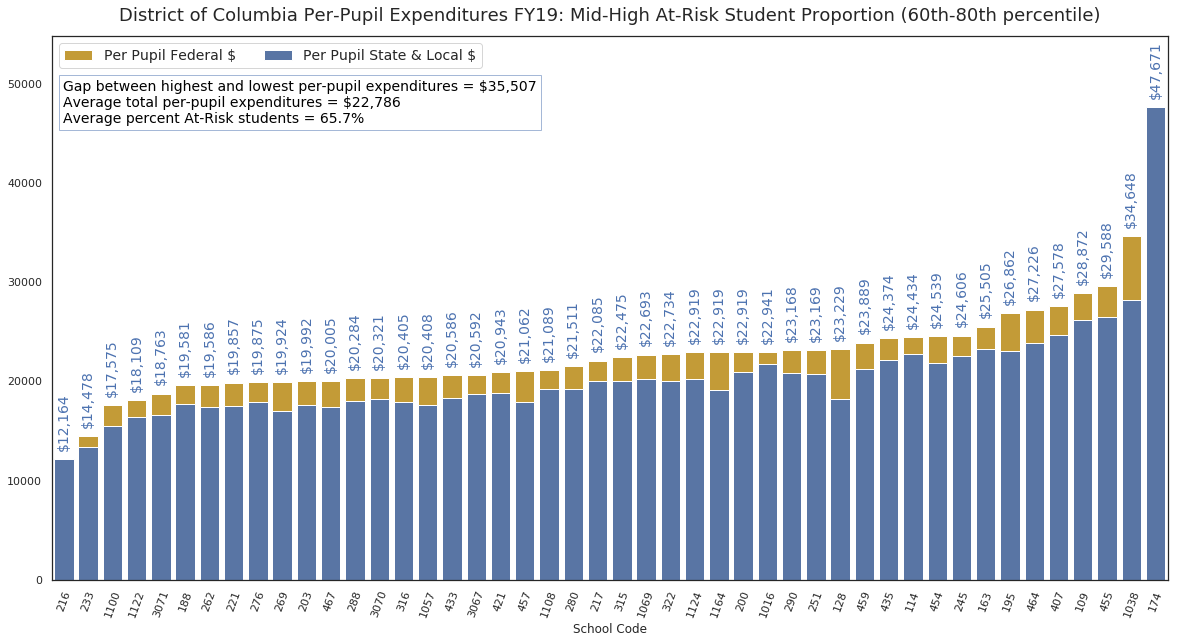

In [401]:
makegraph(df80, subtitle = "Mid-High At-Risk Student Proportion (60th-80th percentile)")

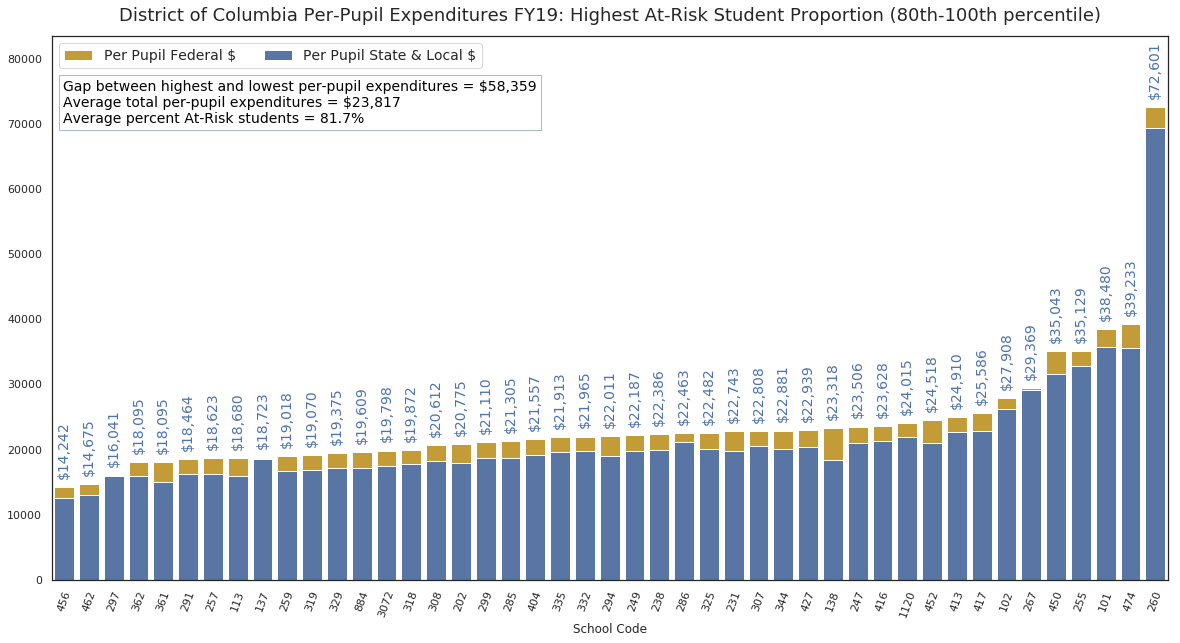

In [402]:
makegraph(df100, subtitle = "Highest At-Risk Student Proportion (80th-100th percentile)")